In [9]:
!pip install koreanize-matplotlib

In [10]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

!git clone https://github.com/ndb796/bing_image_downloader

fatal: destination path 'bing_image_downloader' already exists and is not an empty directory.


In [11]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader

### 코랩에서 dir만들때는 코드로 만들기!!!!!!!!!!!!!

In [12]:
directory_list = [
    './dataset/train/',
    './dataset/test/'
]

for dir in directory_list:

  # dir가 존재하지 않으면
  if not os.path.isdir(dir):
    os.makedirs(dir)

In [13]:
downloader.download('마동석',limit=50,output_dir='./',adult_filter_off=True, force_replace=False, timeout=60 )
downloader.download('카리나',limit=50,output_dir='./',adult_filter_off=True, force_replace=False, timeout=60 )
downloader.download('이국주',limit=50,output_dir='./',adult_filter_off=True, force_replace=False, timeout=60 )

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://cdn.movietok.kr/news/photo/202205/12331_15492_1230.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/22638B4C582ECAD124)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://cdn.newsen.com/newsen/news_photo/2017/10/07/201710070208430210_1.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://dh.aks.ac.kr/Edu/wiki/images/d/d6/마동석.jpg)
[Info] Issue getting: http://dh.aks.ac.kr/Edu/wiki/images/d/d6/마동석.jpg
[Error] 'ascii' codec can't encode characters in position 26-28: ordinal not in range(128)
#4 이미지 다운로드 (http://image.cine21.com/resize/cine21/person/2020/0814/11_35_05__5f35f85987424[W578-].JPG)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://newsroom.etomato.com/userfiles/DSC05108.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://i.pinimg.com/736x/2a/8f/10/2a8f10575bce8ca0013459556a317591--jpg.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://img.hankyung.com/photo/201709/01.14677695.1.jpg)
#7 파일 다운로드가 완료되었습니다.
#

In [15]:
# 수집한 이미지를 학습 데이터 평가 데이터로 구분하는 함수

def dataset_split(query,train_cnt):

  for dir in directory_list:
    if not os.path.isdir(dir+'/'+query):
      os.makedirs(dir+query)

  cnt = 0
  # query에 해당하는 파일 가져오기
  for file_name in os.listdir(query):
      if cnt < train_cnt:
          print(f'trainset : {file_name}')
          shutil.move(query+'/'+file_name,'./dataset/train/'+query+'/'+file_name)
      else:
          print(f'testset : {file_name}')
          shutil.move(query+'/'+file_name,'./dataset/test/'+query+'/'+file_name)

      cnt += 1

In [ ]:
# '마동석'을 40개 train으로 쓰겠다
dataset_split('마동석',40)

In [17]:
dataset_split('카리나',40)
dataset_split('이국주',40)

trainset : image_36.jpg
trainset : image_1.jpg
trainset : image_25.jpeg
trainset : image_41.jpg
trainset : image_17.jpg
trainset : image_7.jpg
trainset : image_18.jpg
trainset : image_12.jpg
trainset : image_33.JPG
trainset : image_22.jpg
trainset : image_27.jpg
trainset : image_45.jpg
trainset : image_4.jpg
trainset : image_34.jpg
trainset : image_32.jpg
trainset : image_40.jpg
trainset : image_20.png
trainset : image_24.jpg
trainset : image_46.gif
trainset : image_44.jpeg
trainset : image_5.png
trainset : image_38.png
trainset : image_39.jpg
trainset : image_19.jpg
trainset : image_21.jpg
trainset : image_43.JPG
trainset : image_50.jpg
trainset : image_26.jpg
trainset : image_35.jpg
trainset : image_49.jpg
trainset : image_3.jpg
trainset : image_9.jpg
trainset : image_10.JPG
trainset : image_8.jpg
trainset : image_28.jpg
trainset : image_11.jpeg
trainset : image_6.jpg
trainset : image_15.jpg
trainset : image_42.jpg
trainset : image_16.jpg
testset : image_29.jpeg
testset : image_37.jp

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets,models,transforms
import numpy as np
import time

In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [33]:
transform_train = transforms.Compose(

     [
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]

)

transform_test = transforms.Compose(

     [
        transforms.Resize((224,224)),
        # transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]

)

### train/ test 데이터

In [34]:
# 폴더 경로로 train,test 데이터 설정
train_datasets = datasets.ImageFolder('./dataset/train',transform=transform_train)
test_datasets = datasets.ImageFolder('./dataset/test',transform=transform_test)

In [35]:
train_datasets.classes

['마동석', '이국주', '카리나']

### train / test 데이터로더

In [53]:
train_loader = torch.utils.data.DataLoader(train_datasets,shuffle=True,batch_size=4)
test_loader = torch.utils.data.DataLoader(test_datasets,shuffle=True,batch_size=4)

In [54]:
len(train_datasets) , len(test_datasets)

(119, 40)

In [55]:
def imshow(img,title):

  # transform에서 tensor로 바꾸었기때문에 numpy()화
  print(img.numpy().shape)
  # c,w,h => w,h,c 변환
  img = img.numpy().transpose((1,2,0))

  std = np.array([0.229,0.224,0.225])
  mean = np.array([0.485,0.456,0.406])

  img = std*img+mean
  # print("clip 전 : ",img)
  img = np.clip(img,0,1)
  # print("clip 후 : ",img)

  plt.imshow(img)
  plt.title(title)
  plt.show()

In [56]:
class_names = train_datasets.classes
class_names

['마동석', '이국주', '카리나']

(3, 228, 906)


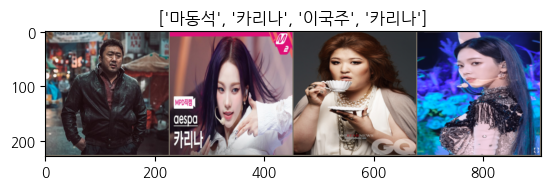

In [57]:
iter_ = iter(train_loader)

data, labels = next(iter_)
# 배치 갯수만큼 나오기 때문에 make_grid() 사용
out = torchvision.utils.make_grid(data)
imshow(out,title=[class_names[i] for i in labels])

In [59]:
# 일단 resnet34의 가중치를 가져옴
model = torchvision.models.resnet34(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [60]:
# (fc): Linear(in_features=512, out_features=1000, bias=True)
# out_features = 3로 변환

for param in model.parameters():
  # param.requires_grad = False == > 전부 동결
  param.requires_grad = False

In [61]:
fc_input_features = model.fc.in_features
fc_input_features

512

In [62]:
# 마지막 분류기만 수정
model.fc = nn.Linear(fc_input_features,3)

for name,module in model.named_parameters():
  print("name : ",name," module.requres_grad : ", module.requires_grad)

name :  conv1.weight  module.requres_grad :  False
name :  bn1.weight  module.requres_grad :  False
name :  bn1.bias  module.requres_grad :  False
name :  layer1.0.conv1.weight  module.requres_grad :  False
name :  layer1.0.bn1.weight  module.requres_grad :  False
name :  layer1.0.bn1.bias  module.requres_grad :  False
name :  layer1.0.conv2.weight  module.requres_grad :  False
name :  layer1.0.bn2.weight  module.requres_grad :  False
name :  layer1.0.bn2.bias  module.requres_grad :  False
name :  layer1.1.conv1.weight  module.requres_grad :  False
name :  layer1.1.bn1.weight  module.requres_grad :  False
name :  layer1.1.bn1.bias  module.requres_grad :  False
name :  layer1.1.conv2.weight  module.requres_grad :  False
name :  layer1.1.bn2.weight  module.requres_grad :  False
name :  layer1.1.bn2.bias  module.requres_grad :  False
name :  layer1.2.conv1.weight  module.requres_grad :  False
name :  layer1.2.bn1.weight  module.requres_grad :  False
name :  layer1.2.bn1.bias  module.requr

In [63]:
# fc만 True
# 나머지는 동결 (False)

In [64]:
optim = optim.Adam(model.parameters(),lr=1e-4)
model.to(device)
start_time =time.time()

# 학습 모드
# model.train()

for epoch in range(50):
  for data, labels in train_loader:

    optim.zero_grad()
    preds = model(data.to(device))
    loss = nn.CrossEntropyLoss()(preds,labels.to(device))
    loss.backward()

    optim.step()
  print("epoch : ",epoch+1, " loss : ", loss.item())

epoch :  1  loss :  0.9685714840888977
epoch :  2  loss :  1.101059913635254
epoch :  3  loss :  0.8869641423225403
epoch :  4  loss :  0.8012635111808777
epoch :  5  loss :  1.1779391765594482
epoch :  6  loss :  0.8961995244026184
epoch :  7  loss :  1.242013692855835
epoch :  8  loss :  0.992055356502533
epoch :  9  loss :  1.0167285203933716
epoch :  10  loss :  0.9718274474143982
epoch :  11  loss :  0.840205192565918
epoch :  12  loss :  0.8304956555366516
epoch :  13  loss :  0.6516799926757812
epoch :  14  loss :  0.8943381309509277
epoch :  15  loss :  0.7861774563789368
epoch :  16  loss :  0.6261732578277588
epoch :  17  loss :  0.7799389958381653
epoch :  18  loss :  0.5556504130363464
epoch :  19  loss :  0.5810002684593201
epoch :  20  loss :  1.184378743171692
epoch :  21  loss :  0.4700993597507477
epoch :  22  loss :  1.1646231412887573
epoch :  23  loss :  0.9650694727897644
epoch :  24  loss :  0.6778871417045593
epoch :  25  loss :  0.43939757347106934
epoch :  26  

In [78]:
# 모델에 dropout, normalize 적용 안되게함
model.eval()

corr = 0
with torch.no_grad():
  for data, labels in test_loader:
    preds = model(data.to(device))
    pred = torch.max(preds,1)[1]
    corr += torch.sum(pred==labels.to(device).data)

    print(f'예측결과 : {class_names[pred[0]]}  실제정답 : {class_names[labels.data[0]]}')
    # 출력하기 위해 data를 다시 cpu로
    imshow(data.cpu().data[0],title=class_names[pred[0]])
  acc = corr / len(test_datasets)
  print("acc : ",acc)

Output hidden; open in https://colab.research.google.com to view.